## Background oMn concentration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd


%matplotlib inline

Observations:

In [ ]:
# Concentration of dMn in 2015
Manuel = pd.read_csv('/ocean/brogalla/GEOTRACES/data/DMn_nmolL-1_BR-edited.csv')
Manuel_station_names = Manuel['Station'].astype('string')
Manuel_depths        = Manuel['Depth'].astype('float')
Manuel_dMn_nmolkg    = Manuel['nmol kg-1'].astype('float').values
Manuel_dMn_nmolL     = Manuel['nmol L-1'].astype('float').values
Manuel_salinity      = Manuel['Salinity'].astype('float').values

dmn_CB2 = Manuel_dMn_nmolL[Manuel_station_names=='CB2'].values
dmn_CB3 = Manuel_dMn_nmolL[Manuel_station_names=='CB3'].values
dmn_CB4 = Manuel_dMn_nmolL[Manuel_station_names=='CB4'].values
depth_CB2 = Manuel_depths[Manuel_station_names=='CB2'].values
depth_CB3 = Manuel_depths[Manuel_station_names=='CB3'].values
depth_CB4 = Manuel_depths[Manuel_station_names=='CB4'].values

# pairs:
dMn_CB2 = np.array([[depth_CB2[i], dmn_CB2[i]] for i in range(0,len(dmn_CB2))])
dMn_CB3 = np.array([[depth_CB3[i], dmn_CB3[i]] for i in range(0,len(dmn_CB3))])
dMn_CB4 = np.array([[depth_CB4[i], dmn_CB4[i]] for i in range(0,len(dmn_CB4))])

In [3]:
# units: pmol / L
pMn_CB3 = np.array([[9.89505,674.0952684], [24.7367,853.3066816], [57.3846,233.4047255], [178.037,4841.507948],
                    [197.81,5127.15382], [474.423,957.305716], [790.098,840.4666579], [1380.7,363.7459108],
                    [1969.64,444.9417019], [2459.18,378.2499246], [3434.95,379.0022695]])

pMn_CB4 = np.array([[10,104.4], [25,272.8], [71,76.1], [150,1636.9], [220,2550.3], [500,1153.7], [800,1012.7],
                    [1401,679.6], [2000,483.0], [2500,537.2], [3499,1488.5]])

pMn_CB2 = np.array([[10,317.1], [25,285.1], [59,144.2], [65,454.4], [140,2868.9], [200,1851.9], [400,982.2],
                    [800,878.8], [1200,1052.5]])

Model:

In [4]:
month = 7
CB2_coord = (507, 383)
CB3_coord = (546, 456)
CB4_coord = (628, 470)

# sp0 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test_20210624/ANHA12_EXH006_2002_monthly.nc') # 0.8 m/day
# sp1 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test1_20210624/ANHA12_EXH006_2002_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test2_20210624/ANHA12_EXH006_2002_monthly.nc')
ref0 = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202103/spin-up5-202103/ANHA12_EXH006_2002_monthly.nc')
ref1 = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202103/spin-up6-202103/ANHA12_EXH006_2002_monthly.nc')
ref2 = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202103/spin-up7-202103/ANHA12_EXH006_2002_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test_20210629/ANHA12_EXH006_2002_monthly.nc') # 0.4 m/day
# sp1 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test1_20210629/ANHA12_EXH006_2002_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ANHA12_test2_20210629/ANHA12_EXH006_2002_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/ref-spin-up0-202106/ANHA12_EXH006_2002_monthly.nc') # 1 m/day
# sp1 = nc.Dataset('/data/brogalla/run_storage/ref-spin-up1-202106/ANHA12_EXH006_2002_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ref-spin-up2-202106/ANHA12_EXH006_2002_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/ANHA12_spin-up5_20210630/ANHA12_EXH006_2002_monthly.nc') # 0.6 m/day + 2x sedice
# sp1 = nc.Dataset('/data/brogalla/run_storage/ANHA12_spin-up6_20210630/ANHA12_EXH006_2002_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ANHA12_spin-up7_20210630/ANHA12_EXH006_2002_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/ANHA12_ref-2013_20210630/ANHA12_EXH006_2013_monthly.nc') # 0.6 m/day + 2x sedice
# sp1 = nc.Dataset('/data/brogalla/run_storage/ANHA12_ref-2014_20210630/ANHA12_EXH006_2014_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/ANHA12_ref-2015_20210630/ANHA12_EXH006_2015_monthly.nc')
# sp0 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2013_20210714-red-hmld/ANHA12_EXH006_2013_monthly.nc') 
# sp1 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2014_20210714-red-hmld/ANHA12_EXH006_2014_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2015_20210714-red-hmld/ANHA12_EXH006_2015_monthly.nc')
sp0 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2010_euphotic/ANHA12_EXH006_2010_monthly.nc') 
sp1 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2013_euphotic/ANHA12_EXH006_2013_monthly.nc')
sp2 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2015_euphotic/ANHA12_EXH006_2015_monthly.nc')


dmn_ref0 = np.array(ref0.variables['dissolmn'])[month,0,:,:,:]
omn_ref0 = np.array(ref0.variables['oxidismn'])[month,0,:,:,:]
dmn_ref1 = np.array(ref1.variables['dissolmn'])[month,0,:,:,:]
omn_ref1 = np.array(ref1.variables['oxidismn'])[month,0,:,:,:]
dmn_ref2 = np.array(ref2.variables['dissolmn'])[month,0,:,:,:]
omn_ref2 = np.array(ref2.variables['oxidismn'])[month,0,:,:,:]

dmn_sp0 = np.array(sp0.variables['dissolmn'])[month,0,:,:,:]
omn_sp0 = np.array(sp0.variables['oxidismn'])[month,0,:,:,:]
dmn_sp1 = np.array(sp1.variables['dissolmn'])[month,0,:,:,:]
omn_sp1 = np.array(sp1.variables['oxidismn'])[month,0,:,:,:]
dmn_sp2 = np.array(sp2.variables['dissolmn'])[month,0,:,:,:]
omn_sp2 = np.array(sp2.variables['oxidismn'])[month,0,:,:,:]

deptht = np.array(sp0.variables['deptht'])

Profiles:

In [5]:
def plot_dMn(dmn_sp0, dmn_sp1, dmn_sp2, dmn_ref0, dmn_ref1, dmn_ref2, sinking_rate):
    fig, ax = plt.subplots(1,3, figsize=(12,8))

    for axis in ax:
        axis.invert_yaxis()
        axis.set_xlim([0,5e-9])
        axis.set_ylim([3000,0])

    # Model:
    fig.suptitle(f'Dissolved Mn; sinking rate = {sinking_rate} m/day')
    ax[0].set_title('CB2')
    ax[0].plot(dmn_sp0[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2013')
    ax[0].plot(dmn_sp1[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2014')
    ax[0].plot(dmn_sp2[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2015')
#     ax[0].plot(dmn_ref0[:,CB2_coord[0],CB2_coord[1]],  deptht, '--', label='spinup5')
#     ax[0].plot(dmn_ref1[:,CB2_coord[0],CB2_coord[1]],  deptht, '--', label='spinup6')
#     ax[0].plot(dmn_ref2[:,CB2_coord[0],CB2_coord[1]],  deptht, '--', label='reference spinup7')
    ax[1].set_title('CB3')
    ax[1].plot(dmn_sp0[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2013')
    ax[1].plot(dmn_sp1[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2014')
    ax[1].plot(dmn_sp2[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2015')
#     ax[1].plot(dmn_ref0[:,CB3_coord[0],CB3_coord[1]],  deptht, '--', label='spinup5')
#     ax[1].plot(dmn_ref1[:,CB3_coord[0],CB3_coord[1]],  deptht, '--', label='spinup6')
#     ax[1].plot(dmn_ref2[:,CB3_coord[0],CB3_coord[1]],  deptht, '--', label='reference spinup7')
    ax[2].set_title('CB4')
    ax[2].plot(dmn_sp0[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2013')
    ax[2].plot(dmn_sp1[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2014')
    ax[2].plot(dmn_sp2[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2015')
#     ax[2].plot(dmn_ref0[:,CB4_coord[0],CB4_coord[1]],  deptht, '--', label='spinup5')
#     ax[2].plot(dmn_ref1[:,CB4_coord[0],CB4_coord[1]],  deptht, '--', label='spinup6')
#     ax[2].plot(dmn_ref2[:,CB4_coord[0],CB4_coord[1]],  deptht, '--', label='reference spinup7')

    # Observations:
    ax[0].plot(dMn_CB2[:,1]*1e-9, dMn_CB2[:,0], '--k', label='observed')
    ax[1].plot(dMn_CB3[:,1]*1e-9, dMn_CB3[:,0], '--k', label='observed')
    ax[2].plot(dMn_CB4[:,1]*1e-9, dMn_CB4[:,0], '--k', label='observed')

    ax[0].set_ylabel('Depth [m]', fontsize=12)
    ax[0].legend(fontsize=12)
    
    return

In [10]:
def plot_oMn(omn_sp0, omn_sp1, omn_sp2, sinking_rate):
    
    fig, ax = plt.subplots(1,3, figsize=(12,8))

    for axis in ax:
        axis.invert_yaxis()
        axis.set_xlim([0,5e-9])
#         axis.set_ylim([3000,0])
        axis.set_ylim([100,0])

    # Model:
    fig.suptitle(f'Particulate Mn; sinking rate = {sinking_rate} m/day')
    ax[0].set_title('CB2')
    ax[0].plot(omn_sp0[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2013')
    ax[0].plot(omn_sp1[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2014')
    ax[0].plot(omn_sp2[:,CB2_coord[0],CB2_coord[1]],  deptht, '-', label='2015')
    ax[1].set_title('CB3')
    ax[1].plot(omn_sp0[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2013')
    ax[1].plot(omn_sp1[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2014')
    ax[1].plot(omn_sp2[:,CB3_coord[0],CB3_coord[1]],  deptht, '-', label='2015')
    ax[2].set_title('CB4')
    ax[2].plot(omn_sp0[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2013')
    ax[2].plot(omn_sp1[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2014')
    ax[2].plot(omn_sp2[:,CB4_coord[0],CB4_coord[1]],  deptht, '-', label='2015')

    # Observations:
    ax[0].plot(pMn_CB2[:,1]*1e-12, pMn_CB2[:,0], '--k', label='observed')
    ax[1].plot(pMn_CB3[:,1]*1e-12, pMn_CB3[:,0], '--k', label='observed')
    ax[2].plot(pMn_CB4[:,1]*1e-12, pMn_CB4[:,0], '--k', label='observed')

    ax[0].set_ylabel('Depth [m]', fontsize=12)
    ax[0].legend(fontsize=12)
    
    return

# Trial spin up runs

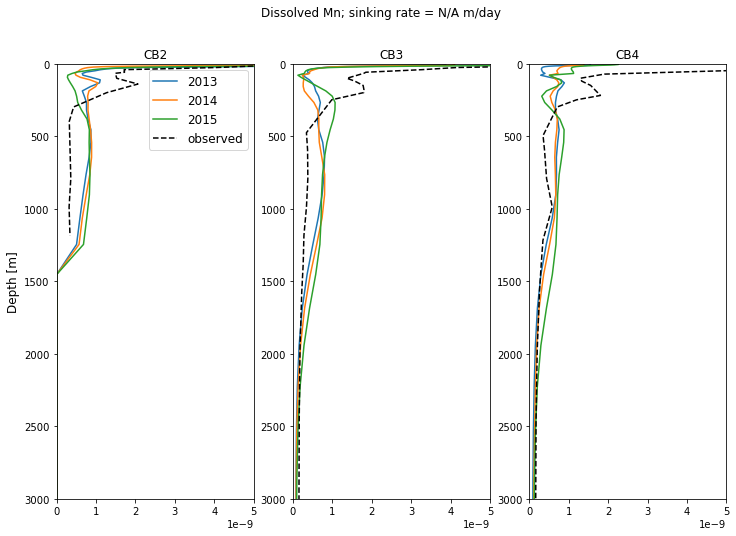

In [7]:
plot_dMn(dmn_sp0, dmn_sp1, dmn_sp2, dmn_ref0, dmn_ref1, dmn_ref2, 'N/A')

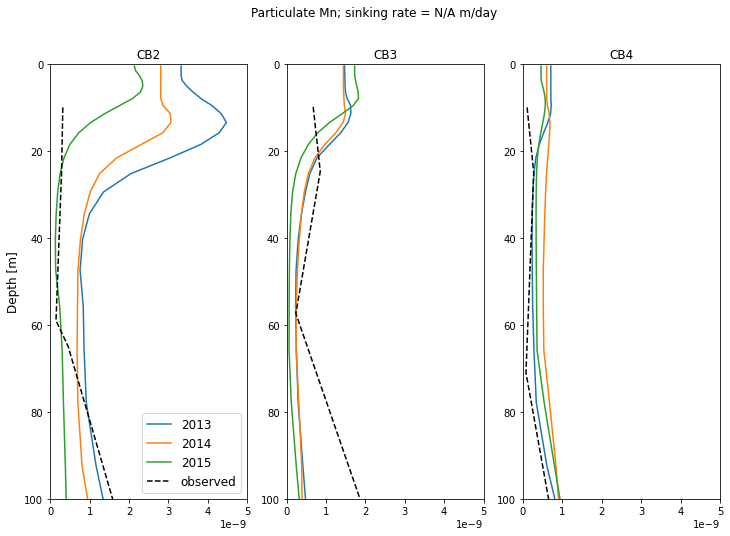

In [11]:
plot_oMn(omn_sp0, omn_sp1, omn_sp2, 'N/A')

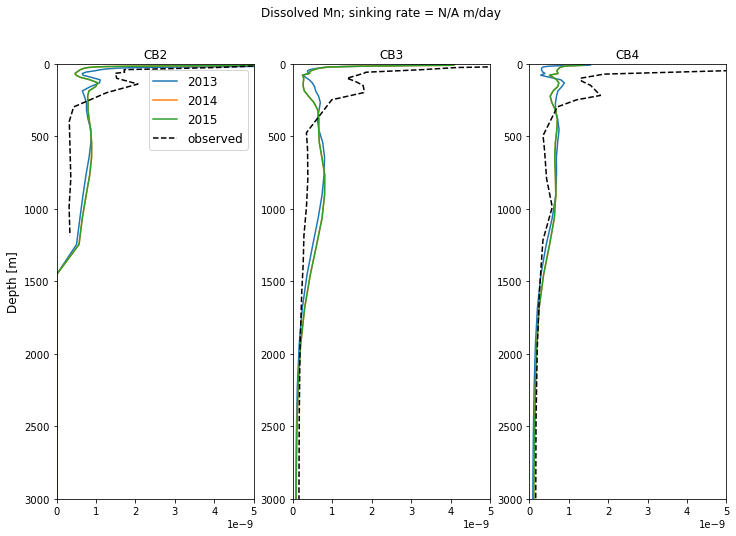

In [7]:
plot_dMn(dmn_sp0, dmn_sp1, dmn_sp2, dmn_ref0, dmn_ref1, dmn_ref2, 'N/A')

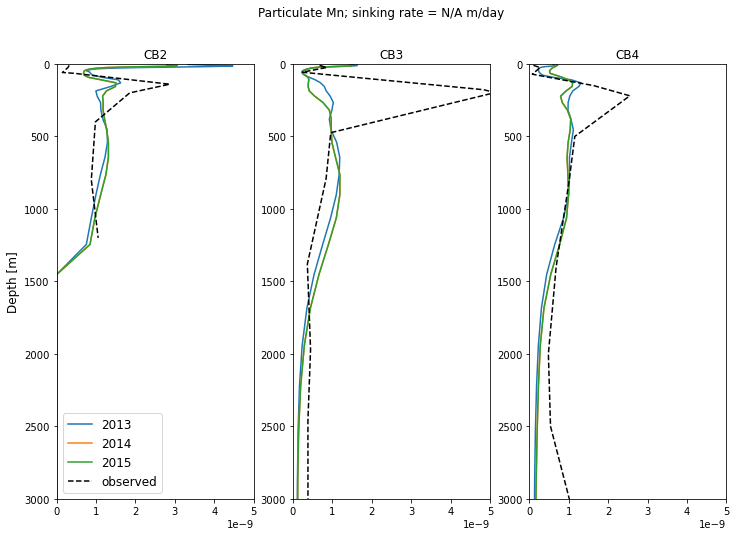

In [8]:
plot_oMn(omn_sp0, omn_sp1, omn_sp2, 'N/A')

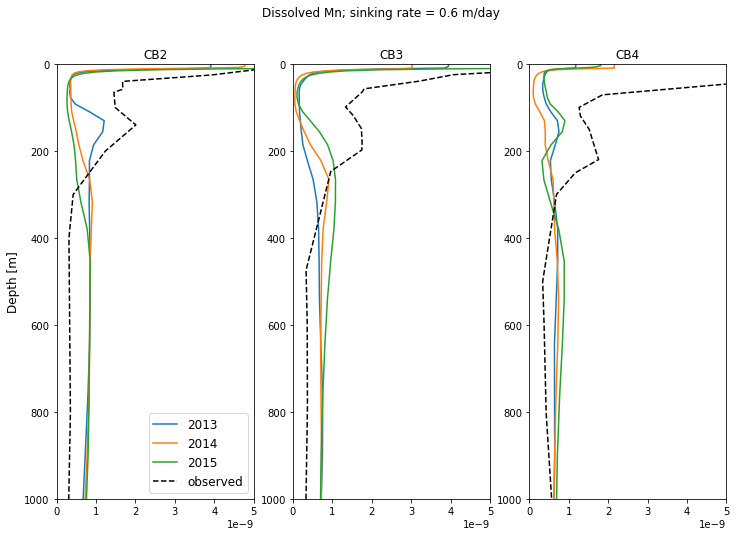

In [14]:
plot_dMn(dmn_sp0, dmn_sp1, dmn_sp2, dmn_ref0, dmn_ref1, dmn_ref2, 0.6)

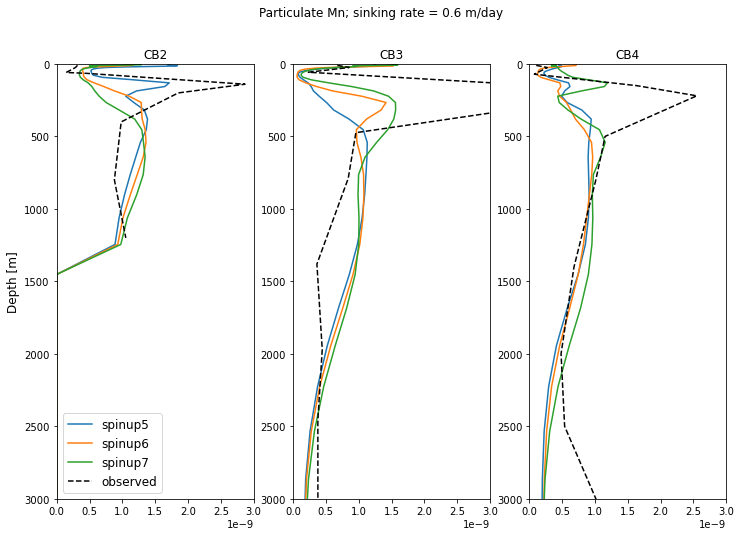

In [9]:
plot_oMn(omn_sp0, omn_sp1, omn_sp2, 0.6)

# Various rates

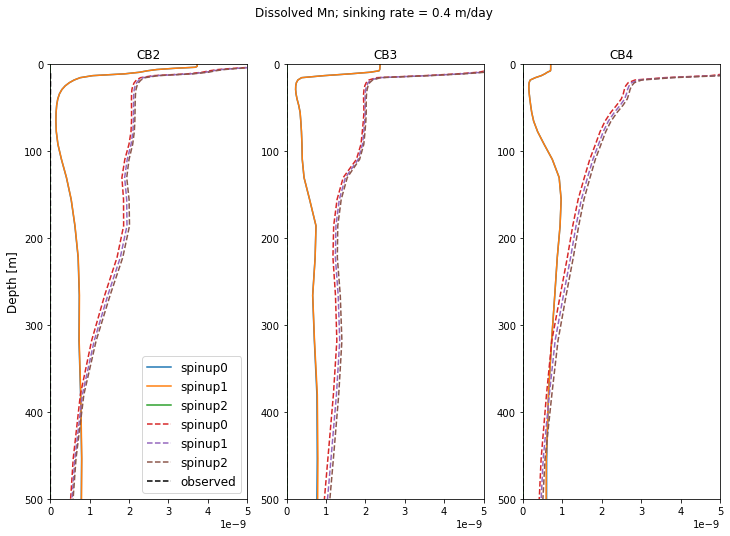

In [9]:
plot_dMn(dmn_sp0, dmn_sp1, np.zeros(dmn_sp1.shape), dmn_ref0, dmn_ref1, dmn_ref2, 0.4)

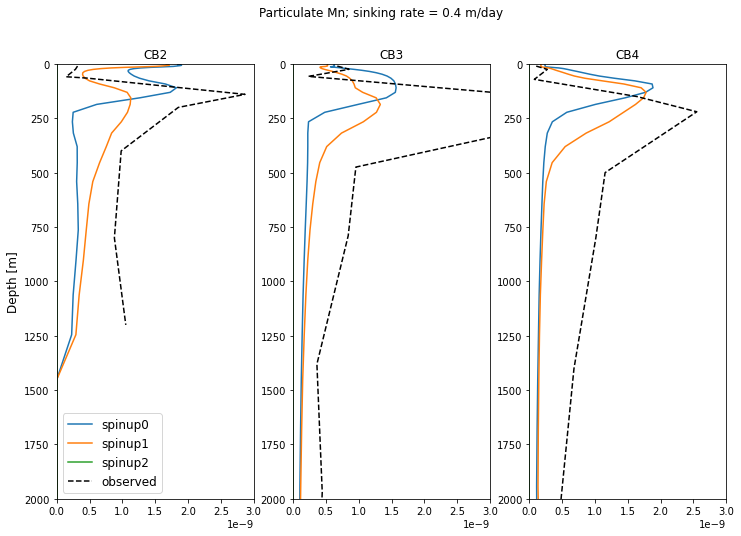

In [14]:
plot_oMn(omn_sp0, omn_sp1, np.zeros(omn_sp1.shape), 0.4)

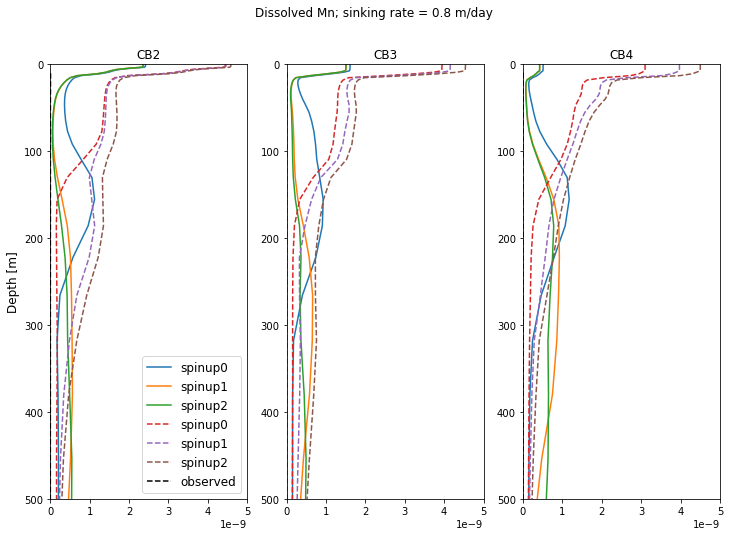

In [7]:
plot_dMn(dmn_sp0, dmn_sp1, dmn_sp2, dmn_ref0, dmn_ref1, dmn_ref2, 0.8)

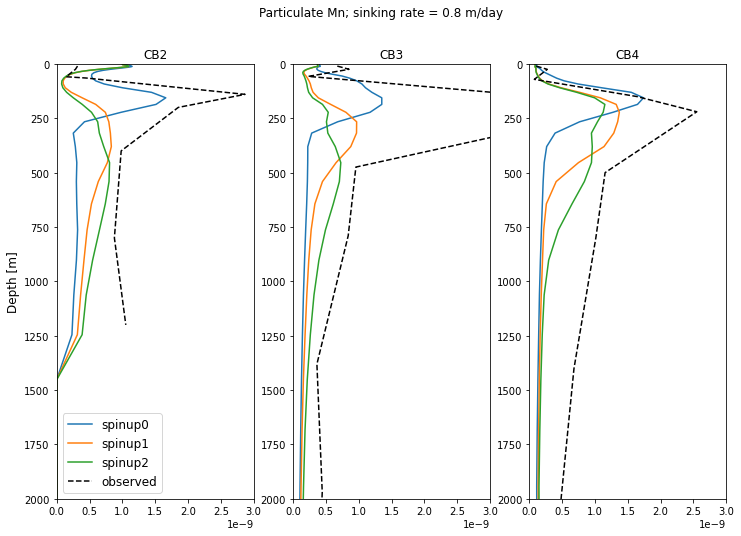

In [8]:
plot_oMn(omn_sp0, omn_sp1, omn_sp2, 0.8)

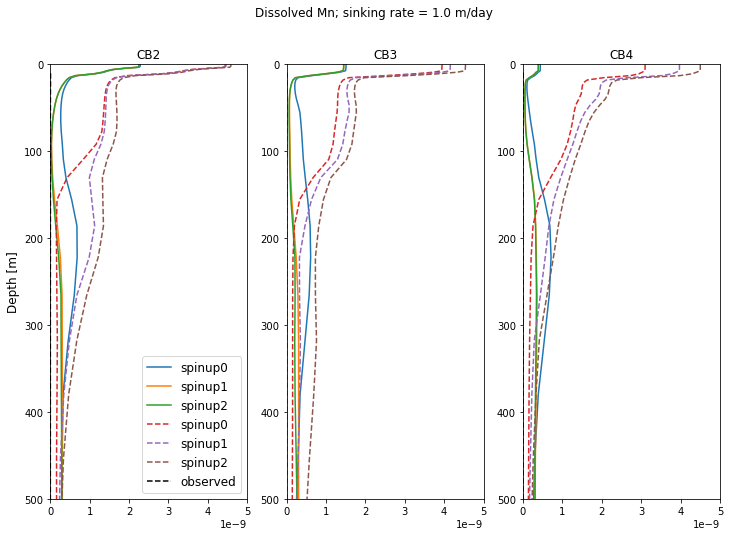

In [7]:
plot_dMn(dmn_sp0, dmn_sp1, dmn_sp2, dmn_ref0, dmn_ref1, dmn_ref2, 1.0)

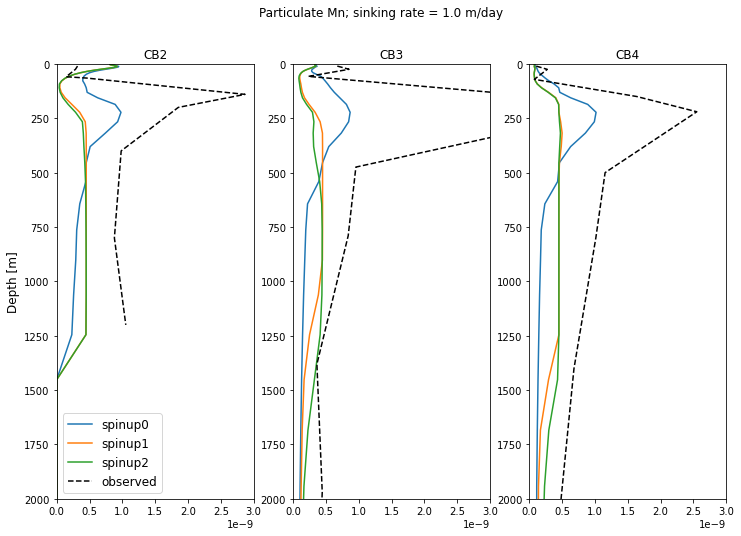

In [8]:
plot_oMn(omn_sp0, omn_sp1, omn_sp2, 1.0)